In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
class ultimaComparacion():
    def __init__(self,tiempos,perdidas,promedios,nombresito):
        self.tiempos = tiempos
        self.registrosPerdidasGlobales = perdidas
        self.registroPromedios = promedios
        self.nombre = nombresito
        self.frecuenciaSampleo = 200 # Sampleo cada 200 datos
        pass
    def anadirDato(self,tiempo,perdida):
        self.tiempos.append(tiempo)
        self.registrosPerdidasGlobales.append(perdida)

In [2]:
fn = "/home/externo/Documents/nico/efficientPINN/pythontesis/v6/RESULTADOS/comparacionDeTiempo/terminados/2022-11-10-20-12-3-soluciones_uniformes.tar"

with open(fn,'rb') as file:
    a = pickle.load(file)
    file.close()
ej = a[0]


In [3]:
resultados = []
resultados_dinamicos_agresivos = []
resultados_dinamicos_conservadores = []
directorio = "/home/externo/Documents/nico/efficientPINN/pythontesis/v6/RESULTADOS/comparacionDeTiempo/terminados"
for filename in os.listdir(directorio):
    if 'soluciones_uniformes.tar' in filename:
        with open(os.path.join(directorio,filename),'rb') as file:
            a = pickle.load(file)
            file.close()
        for solucion in a:
            resultados.append(solucion)
    if 'soluciones_dinamicas.tar' in filename:
        with open(os.path.join(directorio,filename),'rb') as file:
            a = pickle.load(file)
            file.close()
        for solucion in a:
            if filename.split('-')[4] == '5':
                resultados_dinamicos_agresivos.append(solucion)
            if filename.split('-')[4] == '30':
                resultados_dinamicos_conservadores.append(solucion)

In [4]:
print(f'Resultados dinamicos {len(resultados_dinamicos_agresivos)}')
print(f'Resultados uniformes {len(resultados)}')
print(f'Resultados totales   {len(os.listdir(directorio))}')

Resultados dinamicos 50
Resultados uniformes 36
Resultados totales   40


filename

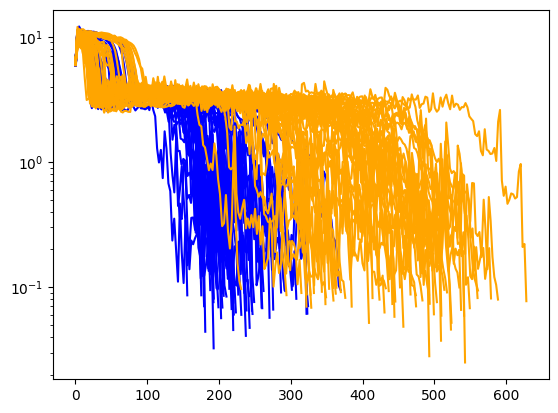

In [5]:
contador = 0
colores = ['blue','green','orange']
for i in resultados_dinamicos_agresivos:
    ej = i
    plt.semilogy(ej.tiempos,ej.registrosPerdidasGlobales, color = 'blue')
for i in resultados_dinamicos_conservadores:
    ej = i
    plt.semilogy(ej.tiempos,ej.registrosPerdidasGlobales, color = 'orange')

In [6]:
tiempos = [i.tiempos[-1] for i in resultados]
tiempos_dinamicos = [i.tiempos[-1] for i in resultados_dinamicos_agresivos]

162.62185637156168
226.81514358520505
291.00843079884845
355.2017180124918
419.39500522613525
483.5882924397786


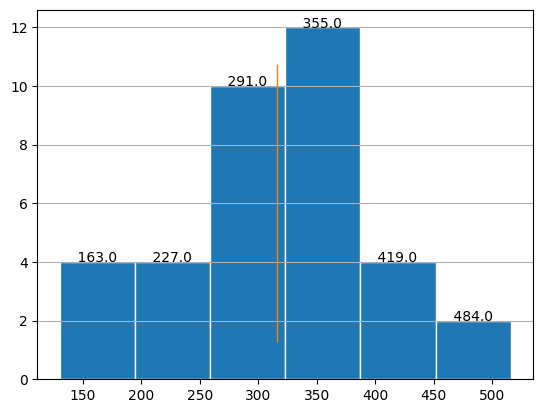

In [7]:
n, bins, inutil = plt.hist(tiempos,bins = 6,edgecolor = 'white')
plt.grid(axis='y')

for i in range(len(n)):
    centro = (bins[i]+bins[i+1])/2
    print(centro)
    plt.text(bins[i],n[i],f'    {np.round(centro,0)}',)

plt.plot(np.mean(tiempos),max(n)/2,ms=200,marker= '|')

173.6600787639618
209.22797226905823
244.79586577415466
280.3637592792511
315.93165278434753
351.49954628944397


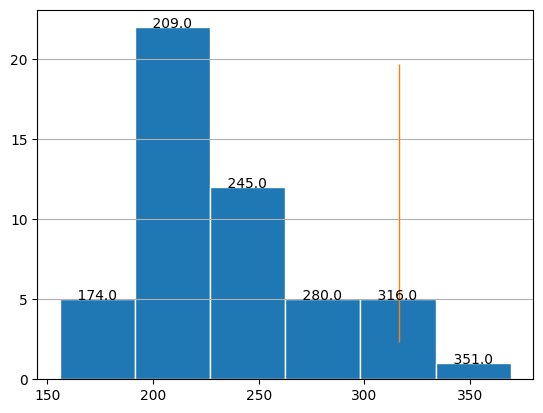

In [8]:
n, bins, inutil = plt.hist(tiempos_dinamicos,bins = 6,edgecolor = 'white')
plt.grid(axis='y')

for i in range(len(n)):
    centro = (bins[i]+bins[i+1])/2
    print(centro)
    plt.text(bins[i],n[i],f'    {np.round(centro,0)}',)

plt.plot(np.mean(tiempos),max(n)/2,ms=200,marker= '|')

162.62185637156168
226.81514358520505
291.00843079884845
355.2017180124918
419.39500522613525
483.5882924397786
173.6600787639618
209.22797226905823
244.79586577415466
280.3637592792511
315.93165278434753
351.49954628944397


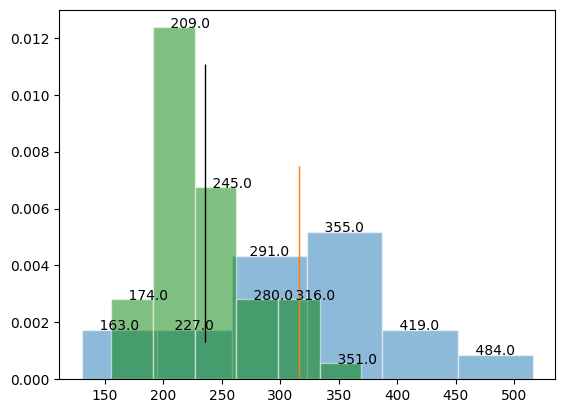

In [9]:
n, bins, inutil = plt.hist(tiempos,density = True,bins = 6,edgecolor = 'white',alpha = 0.5, label = 'Tiempos de convergencia sin algoritmo')
plt.grid(axis='y')

for i in range(len(n)):
    centro = (bins[i]+bins[i+1])/2
    print(centro)
    plt.text(bins[i],n[i],f'    {np.round(centro,0)}',)

plt.plot(np.mean(tiempos),max(n)/2,ms=200,marker= '|', label = 'Promedio tiempos sin algoritmo')

n, bins, inutil = plt.hist(tiempos_dinamicos,density=True,bins = 6, color = 'green',edgecolor = 'white', alpha = 0.5, label = 'Tiempos de convergencia con algoritmo')
plt.grid(axis='y')

for i in range(len(n)):
    centro = (bins[i]+bins[i+1])/2
    print(centro)
    plt.text(bins[i],n[i],f'    {np.round(centro,0)}',)

plt.plot(np.mean(tiempos_dinamicos),max(n)/2,ms=200,marker= '|', color = 'black' ,label = 'Promedio tiempos con Algoritmo')
#plt.legend()

In [10]:
100 - 100*np.mean(tiempos_dinamicos)/np.mean(tiempos)

25.433648515561472

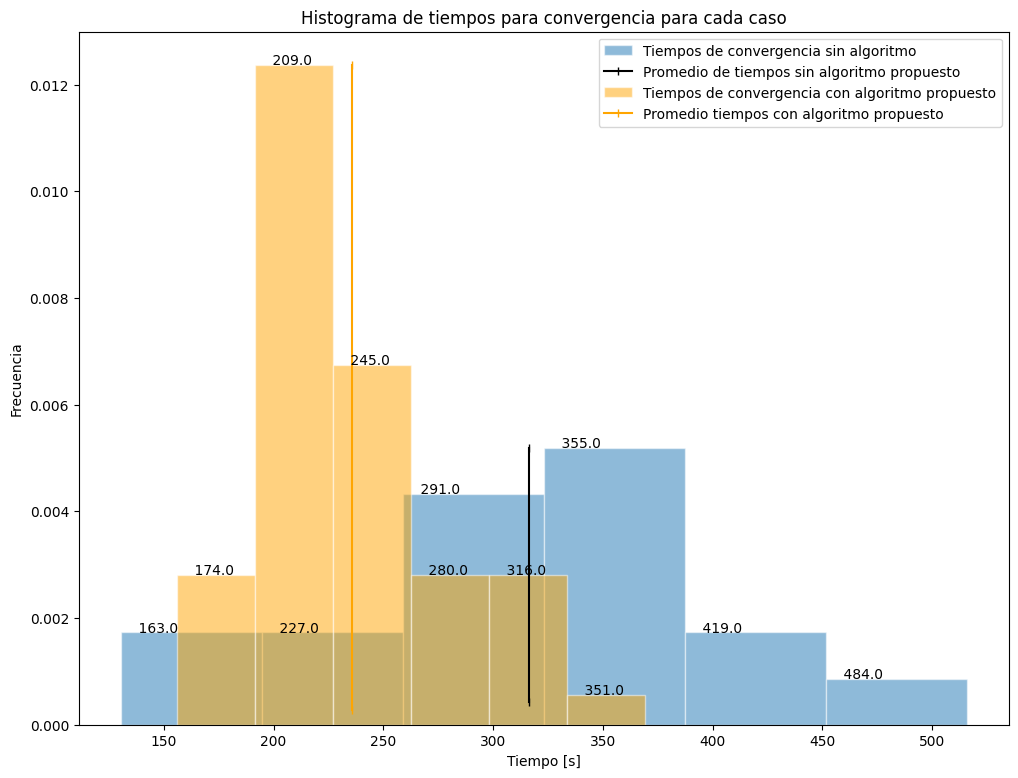

In [15]:
plt.figure(figsize=(12,9))
tiempos = [i.tiempos[-1] for i in resultados]
tiempos_dinamicos = [i.tiempos[-1] for i in resultados_dinamicos_agresivos]
tiempos_dinamicos_conservadores = [i.tiempos[-1] for i in resultados_dinamicos_conservadores]

n, bins, inutil = plt.hist(tiempos,density = True,bins = 6,edgecolor = 'white',alpha = 0.5, label = 'Tiempos de convergencia sin algoritmo')
plt.grid(axis='y')

for i in range(len(n)):
    centro = (bins[i]+bins[i+1])/2
    plt.text(bins[i],n[i],f'    {np.round(centro,0)}',)

plt.plot([np.mean(tiempos),np.mean(tiempos)],[max(n),min(n)/2],marker= '|', color = 'black',label = 'Promedio de tiempos sin algoritmo propuesto')


n, bins, inutil = plt.hist(tiempos_dinamicos,density=True,bins = 6, color = 'orange',edgecolor = 'white', alpha = 0.5, label = 'Tiempos de convergencia con algoritmo propuesto')
plt.grid(axis='y')

for i in range(len(n)):
    centro = (bins[i]+bins[i+1])/2
    plt.text(bins[i],n[i],f'    {np.round(centro,0)}',)

plt.plot([np.mean(tiempos_dinamicos),np.mean(tiempos_dinamicos)],[max(n),min(n)/2],marker= '|', color = 'orange',label = 'Promedio tiempos con algoritmo propuesto')
plt.legend()
plt.title('Histograma de tiempos para convergencia para cada caso')
plt.ylabel('Frecuencia')
plt.xlabel('Tiempo [s]')
plt.savefig('/home/externo/Documents/nico/efficientPINN/pythontesis/Final_files/histograma_final.jpg')